<a href="https://colab.research.google.com/github/BhuvanGowdaN13/Sentiment_Analysis_of_Restaurant_Reviews/blob/main/Sentiment_Analysis_of_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import nltk
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as ps

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
df.shape

(1000, 2)

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [7]:
from nltk.stem.snowball import PorterStemmer
ps=PorterStemmer()
def text_process(msg):
  nopunc=[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  nopunc= ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
  return ' '.join([ps.stem(word) for word in nopunc.split()])

In [8]:
df['tokenized_review']=df['Review'].apply(text_process)

In [9]:
df.head()

,Review,Liked,tokenized_review
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


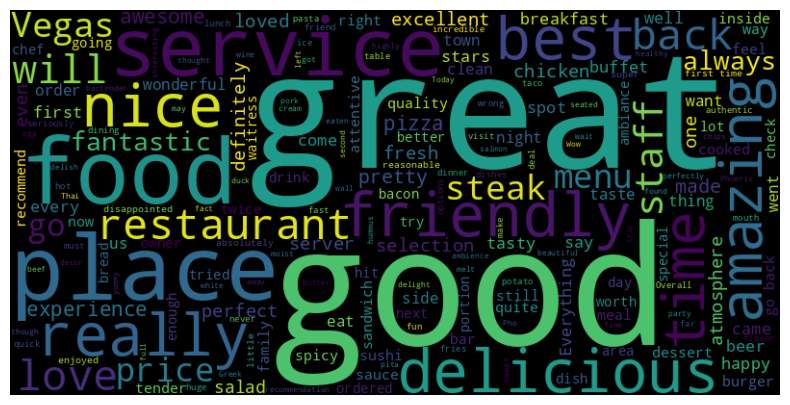

In [10]:
#positive words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==1,:]
text=" ".join([text for text in word_cloud['Review']])

wordcloud=WordCloud(width=800,height=400,background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

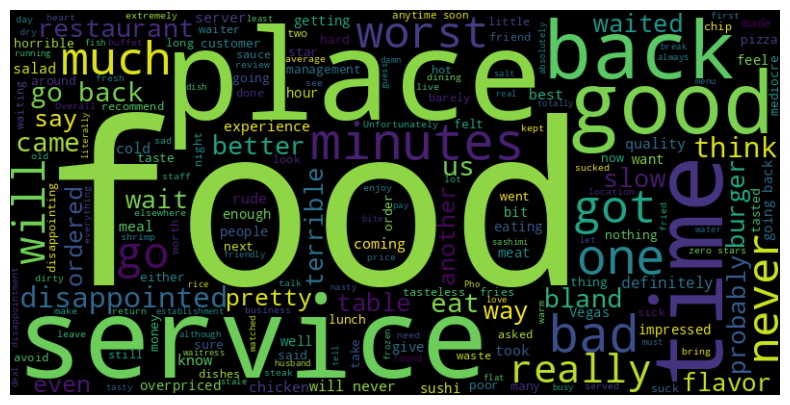

In [11]:
#negative words
word_cloud=df.loc[df['Liked']==0,:]
text=" ".join([text for text in word_cloud['Review']])

wordcloud=WordCloud(width=800,height=400,background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
#vectorizer=CountVectorizer(max_df=0.9,min_df=10)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x=vectorizer.fit_transform(df['tokenized_review']).toarray()

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(df['tokenized_review'],df['Liked'],random_state=107,test_size=0.2)

In [14]:
xtrain.head()

675                 fantast neighborhood gem
561                         two felt disgust
535    excel new restaur experienc frenchman
266                        servic par either
199                              worth drive
Name: tokenized_review, dtype: object

In [15]:
train_vectorized=vectorizer.transform(xtrain)
test_vectorized=vectorizer.transform(xtest)

In [16]:
xtrain_array=train_vectorized.toarray()
xtest_array=test_vectorized.toarray()


In [17]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(xtrain_array,ytrain)


GaussianNB()

In [18]:
ytrain_pred_nb=nb.predict(xtrain_array)
ytest_pred_nb=nb.predict(xtest_array)

In [19]:
pd.DataFrame({'Actual Values':ytest,'Predicted Values':ytest_pred_nb})

,Actual Values,Predicted Values
906,0,0
24,1,1
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,1
839,1,1
495,0,1


In [20]:
def print_metrics(actual,predicted):
  print('accuracy score is :',accuracy_score(actual,predicted))
  print('precision score is :',precision_score(actual,predicted))
  print('recall score is :',recall_score(actual,predicted))
  print('f1 score is :',f1_score(actual,predicted))
  print('roc_auc score is :',roc_auc_score(actual,predicted))
  print('confusion matrix is :',confusion_matrix(actual,predicted))
  print('classification report is :',classification_report(actual,predicted))


In [21]:
print_metrics(ytrain,ytrain_pred_nb)

accuracy score is : 0.94125
precision score is : 0.8943820224719101
recall score is : 1.0
f1 score is : 0.9442467378410438
roc_auc score is : 0.941542288557214
confusion matrix is : [[355  47]
 [  0 398]]
classification report is :               precision    recall  f1-score   support

           0       1.00      0.88      0.94       402
           1       0.89      1.00      0.94       398

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



In [22]:
print_metrics(ytest,ytest_pred_nb)


accuracy score is : 0.675
precision score is : 0.6581196581196581
recall score is : 0.7549019607843137
f1 score is : 0.7031963470319635
roc_auc score is : 0.6733693477390956
confusion matrix is : [[58 40]
 [25 77]]
classification report is :               precision    recall  f1-score   support

           0       0.70      0.59      0.64        98
           1       0.66      0.75      0.70       102

    accuracy                           0.68       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.68      0.67       200



In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_array,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [24]:
ytrain_pred_knn=knn.predict(xtrain_array)
ytest_pred_knn=knn.predict(xtest_array)


In [25]:
print_metrics(ytest,ytest_pred_knn)

accuracy score is : 0.76
precision score is : 0.7410714285714286
recall score is : 0.8137254901960784
f1 score is : 0.7757009345794393
roc_auc score is : 0.7589035614245698
confusion matrix is : [[69 29]
 [19 83]]
classification report is :               precision    recall  f1-score   support

           0       0.78      0.70      0.74        98
           1       0.74      0.81      0.78       102

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [26]:
#hyperparameter tuning
best_accuracy=0.0
alpha_val=0

for i in np.arange(1,11):
  temp_cls=KNeighborsClassifier(n_neighbors=i)
  temp_cls.fit(xtrain_array,ytrain)
  ytest_pred_hp=temp_cls.predict(xtest_array)
  score=accuracy_score(ytest,ytest_pred_hp)
  print('accuracy score for neighbors-{} is :{}%'.format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy=score
    alpha_val=i
print('-----------------------------------------')
print('The best accuracy is {}% with neighbors value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))

accuracy score for neighbors-1 is :72.0%
accuracy score for neighbors-2 is :72.5%
accuracy score for neighbors-3 is :76.0%
accuracy score for neighbors-4 is :77.0%
accuracy score for neighbors-5 is :76.5%
accuracy score for neighbors-6 is :74.5%
accuracy score for neighbors-7 is :76.5%
accuracy score for neighbors-8 is :73.5%
accuracy score for neighbors-9 is :75.5%
accuracy score for neighbors-10 is :77.0%
-----------------------------------------
The best accuracy is 77.0% with neighbors value as 4


In [27]:
mnb=MultinomialNB()
mnb.fit(xtrain_array,ytrain)

MultinomialNB()

In [28]:
ytrain_pred_mnb=mnb.predict(xtrain_array)
ytest_pred_mnb=mnb.predict(xtest_array)

In [29]:
print_metrics(ytrain,ytrain_pred_mnb)


accuracy score is : 0.9575
precision score is : 0.9690721649484536
recall score is : 0.9447236180904522
f1 score is : 0.9567430025445293
roc_auc score is : 0.9574364359108978
confusion matrix is : [[390  12]
 [ 22 376]]
classification report is :               precision    recall  f1-score   support

           0       0.95      0.97      0.96       402
           1       0.97      0.94      0.96       398

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



In [30]:
print_metrics(ytest,ytest_pred_mnb)


accuracy score is : 0.81
precision score is : 0.8018867924528302
recall score is : 0.8333333333333334
f1 score is : 0.8173076923076923
roc_auc score is : 0.8095238095238095
confusion matrix is : [[77 21]
 [17 85]]
classification report is :               precision    recall  f1-score   support

           0       0.82      0.79      0.80        98
           1       0.80      0.83      0.82       102

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [31]:
#hyperparameter tuning
best_accuracy=0.0
alpha_val=0

for i in np.arange(0.01,1.1,0.1):
  temp_cls=MultinomialNB(alpha=i)
  temp_cls.fit(xtrain_array,ytrain)
  ytest_pred_hp=temp_cls.predict(xtest_array)
  score=accuracy_score(ytest,ytest_pred_hp)
  print('accuracy score for alpha-{} is :{}%'.format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy=score
    alpha_val=i
print('-----------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))

accuracy score for alpha-0.0 is :75.5%
accuracy score for alpha-0.1 is :77.5%
accuracy score for alpha-0.2 is :80.0%
accuracy score for alpha-0.3 is :80.0%
accuracy score for alpha-0.4 is :80.5%
accuracy score for alpha-0.5 is :80.0%
accuracy score for alpha-0.6 is :80.0%
accuracy score for alpha-0.7 is :79.5%
accuracy score for alpha-0.8 is :80.5%
accuracy score for alpha-0.9 is :80.5%
accuracy score for alpha-1.0 is :81.0%
-----------------------------------------
The best accuracy is 81.0% with alpha value as 1.0


Prediction


In [32]:
def predict_review(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = vectorizer.transform([final_message]).toarray()
    return mnb.predict(temp)

In [33]:
result = ['Ohhh! Negetive Review','Good! Positive Review']

In [34]:
msg = 'The food is really good here.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Good! Positive Review


In [35]:
msg = 'Food was pretty bad and the service was very slow.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Ohhh! Negetive Review
